# Modeling and Simulation in Python

Audrey Lee


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

Initialize starting values.


In [2]:
init  = State(R = 1000, L = 0, E = 0, V = 4 * 10 ** (-7))
system = System(tau = .2, gamma = 1.36, mu = 1.36 * 10 ** (-3), beta = .00027, 
                rho = .1, alpha = 3.6 * 10 ** (-2), omega = 2, delta = .33, pi = 100)

,values
tau,0.20000
gamma,1.36000
mu,0.00136
beta,0.00027
rho,0.10000
alpha,0.03600
omega,2.00000
delta,0.33000
pi,100.00000


The differentiable equations for R, L, E, & V that update every time step.
dt is 13/100 of the designated time step.

In [3]:
def update_func(state, t, system):
    R, L, E, V = state
    dt = .13
    
    RtoLE = system.beta*R*V
    Rbirth = system.gamma * system.tau
    Rdeath = system.mu * R
    RtoE = (1- system.rho) * system.beta * R * V
    RtoL = system.rho * system.beta * R * V
    
    LtoE = system.alpha * L    
    Ldeath = system.mu * L
    
    Edeath = system.delta * E
   
    Vbirth = system.pi * E
    Vdeath = system.omega * V
    
    R += (Rbirth - RtoLE - Rdeath) * dt
    L += (RtoL - Ldeath - LtoE) * dt
    E += (RtoE - Edeath + LtoE) * dt
    V += (Vbirth - Vdeath)* dt
    
    return State(R=R, L=L, E=E, V=V)

Time step starts at 0 and goes to 120. run_simulation runs the time step from 0 to 120 into the update function.

In [4]:
t0 = 0
t_end = 120
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [5]:
results = run_simulation(system, update_func)
print(results.head())
def plot_results(R, L, E, V):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(R, '--', label='R')
    plot(L, '-', label='L')
    plot(E, ':', label='E')
    plot(V, '*', label='V')
    decorate(xlabel='Time',
             ylabel='Population')

             R             L             E             V
0  1000.000000  0.000000e+00  0.000000e+00  4.000000e-07
1   999.858560  1.404000e-09  1.263600e-08  2.960000e-07
2   999.717145  2.435994e-09  2.144980e-08  3.833080e-07
3   999.575755  3.769193e-09  3.264628e-08  5.624954e-07
4   999.434390  5.724408e-09  4.902509e-08  8.406482e-07


Plots results of R, L, E, & V

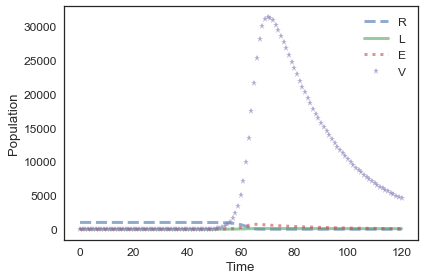

In [6]:
plot_results(results.R, results.L, results.E, results.V)

Plots each result in its own separate graph.

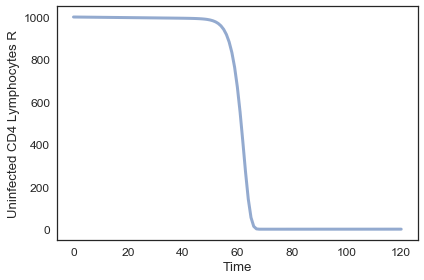

In [7]:
plot(results.R)
decorate(xlabel='Time',
        ylabel='Uninfected CD4 Lymphocytes R')

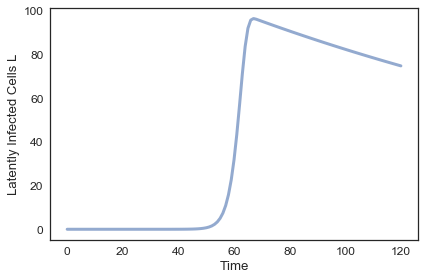

In [8]:
plot(results.L)
decorate(xlabel='Time',
        ylabel='Latently Infected Cells L')

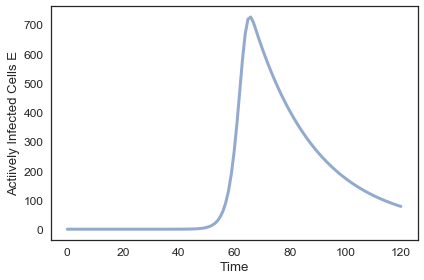

In [9]:
plot(results.E)
decorate(xlabel='Time',
        ylabel='Actiively Infected Cells E')

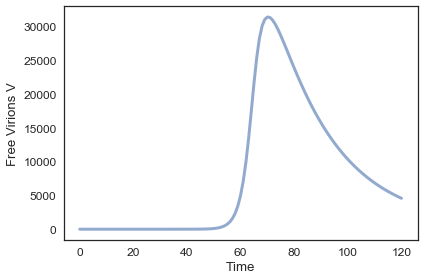

In [10]:
plot(results.V)
decorate(xlabel='Time',
        ylabel='Free Virions V')